## AirBNB Price Prediction

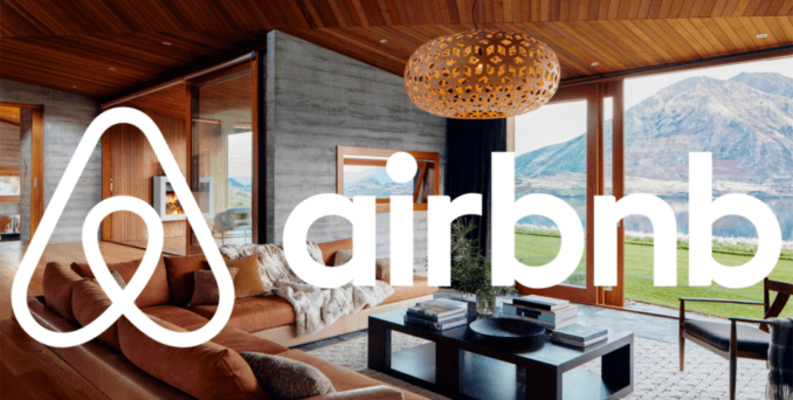

Based on different aspects, we have carried out a case study report on the popular hotel and stay chain business “AirBNB”. Airbnb, Inc. is an American San Francisco-based company operating an online marketplace for short-term homestays and experiences.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique and personalized way of experiencing the world. Today, Airbnb has become one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

### IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install cufflinks
import cufflinks as cf
cf.set_config_file(offline=True)

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/81.7 kB 320.0 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 544.7 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 650.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for colorlover>=0.2.1 from https://files.pythonhosted.org/packages/9a/53/f696e4480b1d1de3b1523991dea71cf417c8b19fe70c704da164f3f90972/colorlover-0.3.0-py3-none-any.whl.metadata
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=beddfdb26db3ccaa2e5cdde29de55acb36b8b1288661e8da6cf1701e18852243
  Stored in directory: c:\users\vansh\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [4]:
#For visualization of latitude and longitude on MAP
!pip install folium
import folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   --------------- ----------------------- 41.0/100.0 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 100.0/100.0 kB 1.2 MB/s eta 0:00:00


In [5]:
#For ignorance of any kind of unnecessary warnings
import warnings
warnings.filterwarnings(action="ignore")

### READING THE DATASET

In [8]:
data = pd.read_csv('airbnb prices.csv')

In [5]:
data.shape

(18723, 20)

In [6]:
data.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [7]:
data.dtypes

room_id                   int64
survey_id                 int64
host_id                   int64
room_type                object
country                 float64
city                     object
borough                 float64
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
bathrooms               float64
price                   float64
minstay                 float64
name                     object
last_modified            object
latitude                float64
longitude               float64
location                 object
dtype: object

### EXPLORATORY DATA ANALYSIS (EDA)

#### DATA CLEANING  PROCESS

#### Handling missing values

In [8]:
data.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

<AxesSubplot:>

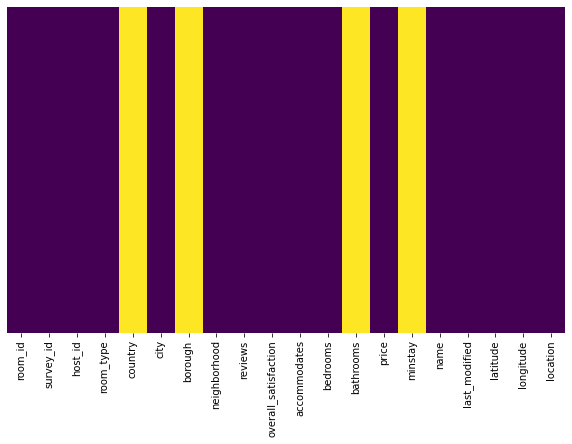

In [9]:
#Visually showing the presence of null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis', cbar=False)

#### FINDING

In the above output, we can see that there are major missing values in features, such as, country, borough, bathroom and minstay, which counts 18723, also we can see that the 'name' feature is missing almost 52 values. Further, we will try to provide values where necessary.

In [10]:
mode = data["country"].mode()
mode

Series([], Name: country, dtype: float64)

In [11]:
data['country'].fillna(value='Netherlands', axis='index', inplace=True)

In [12]:
data['country'].isnull().sum()

0

In [13]:
mode = data["borough"].mode()
mode
data['borough'].fillna(value='Centrum', axis='index', inplace=True)
data['borough'].isnull().sum()

0

In [14]:
mode = data["bathrooms"].mode()
mode
data['bathrooms'].fillna(value='1', axis='index', inplace=True)
data['bathrooms'].isnull().sum()

0

In [15]:
mode = data["minstay"].mode()
mode
data['minstay'].fillna(value='1 Day', axis='index', inplace=True)
data['minstay'].isnull().sum()

0

In [16]:
data['name'].isnull().sum()

52

In [17]:
data['name'].value_counts()

Amsterdam                                             36
Lovely apartment near Vondelpark                      10
Magnificent panoramic city view                        8
Beautiful apartment in Amsterdam                       8
Cosy apartment in Amsterdam                            8
                                                      ..
Bright and trendy apt, sunny balcony -De Pijp, RAI     1
Bright & Cozy Apartment in the Pijp                    1
NEW! Monumental Apartment In The Heart of the City     1
A great apartment in Amsterdam’s vibrant ‘de Pijp’     1
I have a room available for rent                       1
Name: name, Length: 18150, dtype: int64

In [18]:
data['name'].fillna(value='Private/shared/Apartmental Rooms', axis='index', inplace=True)
data['name'].isnull().sum()

0

With the help of the above codes, all the features having missing values have been provided with certain values without effecting the dataset.

### DATA CLEANING PROCESS

In [19]:
data.isnull().sum()

room_id                 0
survey_id               0
host_id                 0
room_type               0
country                 0
city                    0
borough                 0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
minstay                 0
name                    0
last_modified           0
latitude                0
longitude               0
location                0
dtype: int64

Now, we can see there are no null values present.

<AxesSubplot:>

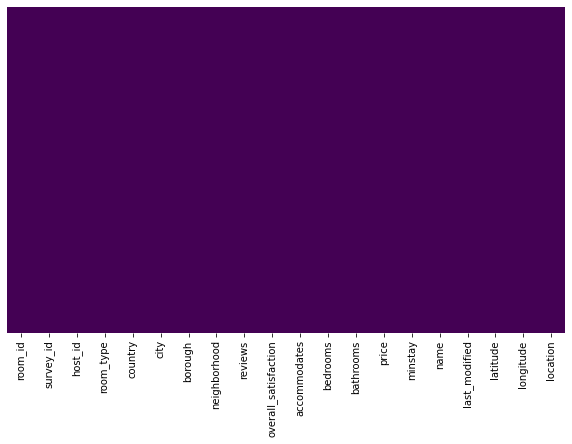

In [20]:
#Visually showing the absence of null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis', cbar=False)

### DATA ANALYSIS

### FINDING TOP EARNERS:

#### We will find out top 20 earners on the basis of names as it represent names of the properties available in AirBNB Netherlands.

In [21]:
data_TopEarners = data.groupby(['name'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
data_TopEarners = data_TopEarners.round(decimals=2)
data_TopEarners

,name,price
17549,"Zonnige woonboot,centraal en rustig",6000.0
12640,One public bedroom,3770.0
1268,AmsterdamBase,1920.0
17318,Welkom in noordzijde,1799.0
16854,"Ultra luxe dreamboat, unforgettable stay promi...",1558.0
10630,Luxurious 3br 110m² houseboat in Amsterdam Cen...,1428.0
17370,Whole house 200m2 Frankendael Park,1412.0
2882,"Bellevue apartment, 2 bedrooms, sleeps 6",1386.0
2476,Beautiful canalhouse for couples near Leidse p...,1343.0
13428,Pure luxe in Amsterdam old south,1319.0


#### We will now visualize above dataset into simple bar chart 

In [22]:
fig = px.bar(data_frame = data_TopEarners,
             x = data_TopEarners['name'], 
             y = data_TopEarners['price'], color="price", text = "price",
             labels = {'name':'Name of Host', 'price':'Average Earnings'})

fig.update_layout(template = 'plotly_dark', title_text = "TOP EARNERS WITH RESPECT TO NAME AND PRICE")
fig.show()

#### FINDINGS

We clearly see that the top 3 earners are:
- 'Zonnige woonboot,centraal en rustig' with highest earning of 6,000
- 'One public bedroom' being on second highest with the earning of 3,770
- 'AmsterdamBase' retains the third position with the earning of 1,920

### MAXIMUM NUMBER OF BOOKING

Here, we will perform analysis on two factors,
> Any particular location getting maximum number of bookings
> Price realtion with respect to location 

#### Let's see which location gets the maximum reviews which will help us understand the maximum number of booking in a particular location

In [23]:
#Checking if the data has unique values
data['location'].unique

<bound method Series.unique of 0        0101000020E610000033FAD170CA8C13403BC5AA41982D...
1        0101000020E6100000842A357BA095134042791F477330...
2        0101000020E6100000A51133FB3CC613403543AA285E2B...
3        0101000020E6100000DF180280638F134085EE92382B30...
4        0101000020E6100000CD902A8A57691340187B2FBE682F...
                               ...                        
18718    0101000020E6100000684293C492D2134080BA8102EF28...
18719    0101000020E61000005801BEDBBCD1134062670A9DD728...
18720    0101000020E61000002079E750865A1340C85F5AD42731...
18721    0101000020E6100000774CDD955D9013400118CFA0A12F...
18722    0101000020E6100000CD565EF23F9913405F7AFB73D130...
Name: location, Length: 18723, dtype: object>

In [24]:
data_MaxBooking = data.groupby(['location'])['reviews'].mean().reset_index().sort_values(by='reviews', ascending=False)[0:20]
data_MaxBooking = data_MaxBooking.round(decimals=2)
data_MaxBooking

,location,reviews
16008,0101000020E6100000DAFE9595268513402C82FFAD642F...,532.0
12477,0101000020E6100000AA46AF06286D134077BB5E9A222E...,465.0
12771,0101000020E6100000AE11C138B8941340AEB8382A372F...,463.0
11555,0101000020E61000009D9FE238F06A1340478D09319730...,452.0
11028,0101000020E6100000965E9B8D959813405DA96741282F...,447.0
14992,0101000020E6100000CCEF3499F19613402DD2C43BC02F...,443.0
13927,0101000020E6100000BE175FB4C78B13407F130A117030...,443.0
5595,0101000020E61000004C6C3EAE0D9513406E6B0BCF4B2F...,433.0
3762,0101000020E610000032CC09DAE480134003EB387EA82E...,430.0
6036,0101000020E6100000529E7939EC6E134006D49B51F32D...,430.0


In [25]:
data['name'].unique

<bound method Series.unique of 0              Red Light/ Canal view apartment (Shared)
1        Sunny and Cozy Living room in quite neighbours
2                                             Amsterdam
3                          Canal boat RIDE in Amsterdam
4          One room for rent in a three room appartment
                              ...                      
18718     1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME
18719                  Modern Room by Arena, ZIGGO, HmH
18720                               Private single room
18721       City Center studio in Touristic Amsterdam 1
18722                  I have a room available for rent
Name: name, Length: 18723, dtype: object>

#### Now we plot a simple bar chart for the above output

In [26]:
fig = px.bar(data_MaxBooking, x="location", y="reviews", color="reviews", barmode="group")
fig.show()

Since, it is not possible to understand the chart as x-axis location are not readable, we will now try to plot the chart by using name feature for better understanding.

In [27]:
data_MaxBooking_name = data.groupby(['name'])['reviews'].mean().reset_index().sort_values(by='reviews', ascending=False)[0:20]
data_MaxBooking_name = data_MaxBooking_name.round(decimals=2)
data_MaxBooking_name

,name,reviews
16474,The Backroom - Central private appt,532.0
6197,Cozy Studio 1 - Perfect for Couple!,465.0
13584,Rebel (Private Room),463.0
8916,Independant studio with balcony and WiFi,452.0
1088,Amsterdam Houseboat 'Centre',447.0
13519,Quiet room in Amsterdam Center,443.0
13348,Private room on the Keizersgracht,443.0
17533,Yves Klein - Private Room,433.0
358,"2p. Studio w. pr. Balcony, Bath, Shower & Toilet",430.0
4142,Central location private attic room,430.0


In [28]:
fig = px.bar(data_MaxBooking_name, x="name", y="reviews", color="reviews", barmode="group")
fig.show()

### Price relation with repect to location

In [29]:
data_price_location = data.groupby(['location'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
data_price_location = data_price_location.round(decimals=2)
data_price_location

,location,price
17300,0101000020E6100000EC884336907E1340F98381E7DE2F...,6000.0
2830,0101000020E6100000261E5036E59A1340266DAAEE912F...,3770.0
17724,0101000020E6100000F2D24D62109813408FDE701FB92F...,1920.0
122,0101000020E610000001DF6DDE3849134027BEDA519C2F...,1799.0
13091,0101000020E6100000B2834A5CC7981340F46F97FDBA2F...,1558.0
9105,0101000020E61000007C98BD6C3B9D13409DBAF2599E2F...,1428.0
4333,0101000020E61000003B8908FF22B81340A5F8F884EC2C...,1412.0
14352,0101000020E6100000C40AB77C24351340B8921D1B8130...,1386.0
16945,0101000020E6100000E7FD7F9C308113407903CC7C072F...,1343.0
9665,0101000020E610000084807C09157C13409C4D4700372D...,1319.0


In [30]:
fig = px.scatter(data_frame = data_price_location,
             x = 'location', 
             y = 'price', color="price", size = "price")

fig.update_layout(template = 'plotly_dark', title_text = "RELATIONSHIP BETWEEN LOCATION AND PRICES")
fig.show()

As we need more clarity on the price vs location we will perform analysis on the basis of neighborhood and price.

In [31]:
data_price_neighborhood = data.groupby(['neighborhood'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
data_price_neighborhood = data_price_neighborhood.round(decimals=2)
data_price_neighborhood

,neighborhood,price
5,Centrum West,208.31
4,Centrum Oost,201.22
14,Noord-West / Noord-Midden,182.73
11,Ijburg / Eiland Zeeburg,175.88
8,De Pijp / Rivierenbuurt,168.34
21,Westerpark,163.76
7,De Baarsjes / Oud West,159.01
17,Oud Noord,156.98
20,Watergraafsmeer,154.67
18,Oud Oost,151.61


In [32]:
fig = px.scatter(data_frame = data_price_neighborhood, y='price', x='neighborhood', color='price', size='price')
fig.update_layout(template = 'plotly_dark', title_text = "RELATIONSHIP BETWEEN NEIGHBORHOOD AND AVERAGE PRICES")
fig.show()

As we can see that the above scatter plot is inderstandable. We try to plot above output using Line Graph.

In [33]:
data_price_neighborhood.iplot(x = "neighborhood", y = "price",
                            xTitle = "Neighborhood", yTitle = "Price", title = "OPEN PRICE FROM APR, 2019 - MAR, 2020")

#### FINDINGS

Here, we found that the price and location have a unique realtion as the prices are unique on the basis of location or name.
On the other hand, we can clearly see the analysis of neighborhood vs price in the scatter plot and line graph. In which it came to our knowledge that the "Centrum West" has the highest average price, i.e., 208.31 also "Centrum Oost" is on second position with the average price of 201.22 while "Noord-West/Noord-Midden" retains the 3rd position in terms of average price of 182.73.

### RELATIONSHIP BETWEEN OVERALL SATISFACTION AND PRICE

In [34]:
data_min_price = data.price.min(), data.overall_satisfaction.max()
data_min_price

(12.0, 5.0)

In [35]:
data_max_price = data.price.max(), data.overall_satisfaction.min()
data_max_price

(6000.0, 0.0)

In [36]:
data_minmax_price = data_min_price, data_max_price
data_minmax_price

((12.0, 5.0), (6000.0, 0.0))

In [37]:
data_price_overall_satisfaction = data.groupby(['price'])['overall_satisfaction'].mean().reset_index().sort_values(by='overall_satisfaction', ascending=False)[0:20]
data_price_overall_satisfaction = data_price_overall_satisfaction.round(decimals=2)
data_price_overall_satisfaction

,price,overall_satisfaction
0,12.0,5.0
280,351.0,5.0
231,283.0,5.0
328,443.0,5.0
327,439.0,5.0
283,356.0,5.0
236,289.0,5.0
241,297.0,5.0
358,512.0,5.0
359,514.0,5.0


In [38]:
fig = px.scatter(data_frame = data_price_overall_satisfaction,
                y = 'overall_satisfaction',
                x = 'price',
                color = 'overall_satisfaction',
                size = 'price')

fig.update_layout(template = 'plotly_dark', title_text = "RELATIONSHIP BETWEEN OVERALL SATISFACTION AND PRICES")
fig.show()

#### FINDINGS

In the above scatter plot we can clearly see that if the 'Price' is higher than the 'Overall satisfaction' is less and where 'Price' is low the 'Overall Satisfaction' is high, for an instance let's take the example where Price = 112.0, the Overall Satisfaction is 5.0, wherre if we tlk about the Price = 6,000, the Overall Satisfaction is 0.0.

### PRICE VS AMENITITES

In [39]:
data_price_amenitites = data.groupby(['name'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
data_price_amenitites = data_price_amenitites.round(decimals=2)
data_price_amenitites

,name,price
17549,"Zonnige woonboot,centraal en rustig",6000.0
12640,One public bedroom,3770.0
1268,AmsterdamBase,1920.0
17318,Welkom in noordzijde,1799.0
16854,"Ultra luxe dreamboat, unforgettable stay promi...",1558.0
10630,Luxurious 3br 110m² houseboat in Amsterdam Cen...,1428.0
17370,Whole house 200m2 Frankendael Park,1412.0
2882,"Bellevue apartment, 2 bedrooms, sleeps 6",1386.0
2476,Beautiful canalhouse for couples near Leidse p...,1343.0
13428,Pure luxe in Amsterdam old south,1319.0


In [40]:
fig = px.scatter(data_frame = data_price_amenitites,
                x = 'name',
                y = 'price',
                color = 'price',
                size = 'price')

fig.update_layout(template = 'plotly_dark', title_text = "PRICES VS AMENITITIES")
fig.show()

### PRICE VS LOCATION

In [41]:
data_price_neighborhood1 = data.groupby(['neighborhood'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
data_price_neighborhood1 = data_price_neighborhood.round(decimals=2)
data_price_neighborhood1

,neighborhood,price
5,Centrum West,208.31
4,Centrum Oost,201.22
14,Noord-West / Noord-Midden,182.73
11,Ijburg / Eiland Zeeburg,175.88
8,De Pijp / Rivierenbuurt,168.34
21,Westerpark,163.76
7,De Baarsjes / Oud West,159.01
17,Oud Noord,156.98
20,Watergraafsmeer,154.67
18,Oud Oost,151.61


In [42]:
data_price_neighborhood1.iplot(kind = "pie",
                              labels = "neighborhood",
                              values = "price",
                              textinfo = 'percent+label', hole = .4,
                              )

#### FINDINGS

Price vs Amenities
Here, we can see that the amenities is of 5-star grade like Boat-House, Bunglow and Resort, etc. the prices are high, where the amenities are 2-star grade like Room, Shared-room, Dormatries, Hostel, etc. theprices are low.

Price vs Location
Here, we take the average price for a particular location to know about the grade of area the price is high if we talk about the major city location or neighborhood.
If we analyze the above donut chart, we can see that the percentage of average price in "Centrum West" holds 6.83%, which is higher than all the other neighborhood.
Also we see that the share of "Gaasperdam/Driemond" is only 3.98% which is less as compared to other neighborhood.

### RELATIONSHIP BETWEEN ROOM TYPE AND NEIGHBORHOOD

In [43]:
data_room = data.groupby(['neighborhood', 'room_type'])['price'].agg('mean').to_frame()
data_room.sort_values(by = 'price', ascending = True, inplace = False)
data_room.head()

price
neighborhood    room_type                  
Bijlmer Centrum Entire home/apt  120.454545
                Private room      70.703704
                Shared room       30.000000
Bijlmer Oost    Entire home/apt  145.533333
                Private room      70.673077

In [44]:
df_data_room = data.groupby(['room_type', 'neighborhood'], as_index=False)['price'].agg('mean')
df_data_room.sort_values(by='price', ascending=False, inplace=True)
df_data_room = df_data_room.round(decimals=2)
df_data_room.head(40)

,room_type,neighborhood,price
5,Entire home/apt,Centrum West,228.97
4,Entire home/apt,Centrum Oost,219.72
11,Entire home/apt,Ijburg / Eiland Zeeburg,201.30
14,Entire home/apt,Noord-West / Noord-Midden,197.61
8,Entire home/apt,De Pijp / Rivierenbuurt,178.94
10,Entire home/apt,Geuzenveld / Slotermeer,176.34
6,Entire home/apt,De Aker / Nieuw Sloten,174.09
21,Entire home/apt,Westerpark,173.79
17,Entire home/apt,Oud Noord,173.06
7,Entire home/apt,De Baarsjes / Oud West,170.99


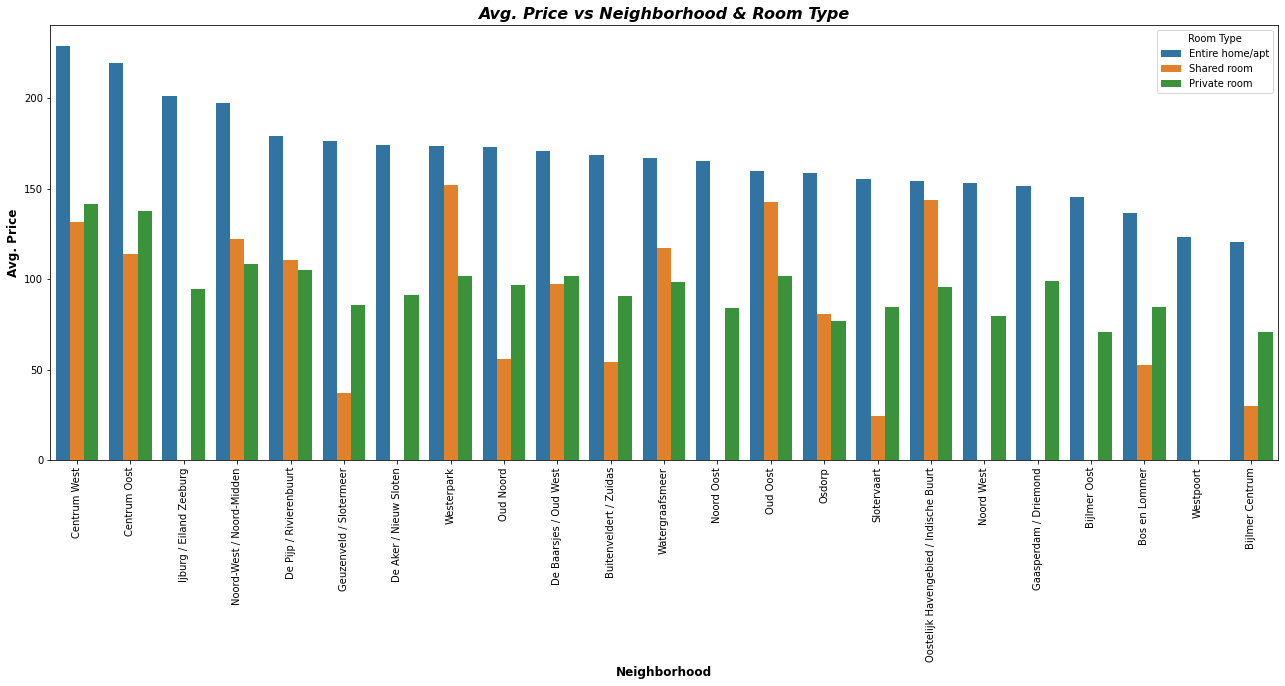

In [45]:
plt.figure(figsize=(22,8))
sns.barplot(data = df_data_room, x = 'neighborhood', y = 'price', hue = 'room_type')
plt.xticks(rotation = 90)
plt.title('Avg. Price vs Neighborhood & Room Type', fontsize=16, fontweight='bold', fontstyle='italic')
plt.xlabel('Neighborhood', fontsize=12, fontweight='bold')
plt.ylabel('Avg. Price', fontsize=12, fontweight='bold')
plt.legend(title = 'Room Type', loc = 'upper right')
plt.show()

#### FINDINGS

Here, we see that the "Centrum west" Neighbourhood is having average price for all the 3 room types available in the dataset is very high in comperison with any other neighbourhood.

### FINDING PREFERENCE OF GUEST IN COMPARISON WITH ROOM TYPE 

In [46]:
data_roomtype = data['room_type'].value_counts()
data_roomtype = data_roomtype.reset_index()
data_roomtype.columns = ['Room_type', 'Count']
data_roomtype.head()

,Room_type,Count
0,Entire home/apt,14978
1,Private room,3682
2,Shared room,63


### FINDING CHEAPEST AirBNB

In [47]:
data_cheapest = data[['name', 'price']].sort_values(by='price').nsmallest(20, columns='price')
data_cheapest = data_cheapest.round()
data_cheapest

,name,price
14750,"SORRY, NO TOURISTS ALLOWED - Kattenoppas gezocht",12.0
25,Relax 9 hours!,18.0
18705,Nice room in de Pijp,21.0
14749,Cozy Studio,22.0
18704,Minimalist White Room,23.0
18691,Cheap and cosy room Amsterdam,24.0
18719,"Modern Room by Arena, ZIGGO, HmH",24.0
14756,"Rent a Tent, Cheap and Fun stay in Amsterdam!",24.0
14754,Historic Dutch Barge - 1870s Built - Sleeps 4,24.0
18696,Room Overtoom Amsterdam Centre,24.0


In [48]:
fig = px.bar(data_frame = data_cheapest,
             x = data_cheapest['price'][0:20], 
             y = data_cheapest['name'][0:20], color=data_cheapest['price'][0:20], text = data_cheapest['price'][0:20],
             labels = {'x':'Cheapest Price', 'y':'Names of AirBNB'}, orientation = 'h')

fig.update_layout(template = 'seaborn', title_text = "AFFORDABLE/BUDGETED AirBNB")
fig.show()

#### FINDINGS

Here, we see that in the top 20 cheapest AirBNB "Kattenoppas gezocht" is having the lowest price of 12.

### FINDING MOST EXPENSIVE AirBNB

In [49]:
data_expensive = data.groupby(['name','room_type'])['price'].mean().reset_index().sort_values(by='price',ascending=False)[0:20]
data_expensive

,name,room_type,price
17587,"Zonnige woonboot,centraal en rustig",Entire home/apt,6000.0
12669,One public bedroom,Entire home/apt,3770.0
1273,AmsterdamBase,Entire home/apt,1920.0
17355,Welkom in noordzijde,Entire home/apt,1799.0
16891,"Ultra luxe dreamboat, unforgettable stay promi...",Entire home/apt,1558.0
10656,Luxurious 3br 110m² houseboat in Amsterdam Cen...,Entire home/apt,1428.0
17407,Whole house 200m2 Frankendael Park,Entire home/apt,1412.0
2891,"Bellevue apartment, 2 bedrooms, sleeps 6",Entire home/apt,1386.0
2485,Beautiful canalhouse for couples near Leidse p...,Entire home/apt,1343.0
13458,Pure luxe in Amsterdam old south,Entire home/apt,1319.0


In [50]:
fig = px.bar(data_frame = data_expensive,
             x = data_expensive['price'], 
             y = data_expensive['name'], color='price', text = 'price',
             labels = {'name':'Name of the AirBNB', 'price':'Avg. Price'})

fig.update_layout(template = 'seaborn', title_text = "TOP 20 MOST EXPENSIVE AirBNB")
fig.show()

#### FINDINGS

Here, we clearly see that the top 20 most expensive AirBNB "Zonnige woonboot,centraal en rustig" is having the most expensive price of 6,000.

### FINDING TOP 5 LOCATION HAVING MOST BOOKING ON AirBNB

In [51]:
data['neighborhood'].unique()

array(['De Pijp / Rivierenbuurt', 'Centrum West', 'Watergraafsmeer',
       'De Baarsjes / Oud West', 'Oostelijk Havengebied / Indische Buurt',
       'Westerpark', 'Oud Oost', 'Centrum Oost',
       'Geuzenveld / Slotermeer', 'Buitenveldert / Zuidas', 'Oud Noord',
       'Bos en Lommer', 'Slotervaart', 'Bijlmer Centrum',
       'Ijburg / Eiland Zeeburg', 'Noord-West / Noord-Midden',
       'De Aker / Nieuw Sloten', 'Noord West', 'Bijlmer Oost', 'Osdorp',
       'Noord Oost', 'Gaasperdam / Driemond', 'Westpoort'], dtype=object)

In [52]:
data['neighborhood(Pre-processed)'] = data['neighborhood']

In [53]:
data_neighborhood = data['neighborhood(Pre-processed)'].value_counts()[0:5]
data_neighborhood

De Baarsjes / Oud West     3289
De Pijp / Rivierenbuurt    2378
Centrum West               2225
Centrum Oost               1730
Westerpark                 1430
Name: neighborhood(Pre-processed), dtype: int64

In [54]:
fig = px.pie(data_frame = data_neighborhood,
             names = data_neighborhood.index, 
             values = data_neighborhood,
             title = 'TOP 5 LOCATION HAVING MAXIMUM NUMBER OF BOOKINGS')

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()

In [55]:
data["neighborhood"].value_counts()

De Baarsjes / Oud West                    3289
De Pijp / Rivierenbuurt                   2378
Centrum West                              2225
Centrum Oost                              1730
Westerpark                                1430
Noord-West / Noord-Midden                 1418
Oud Oost                                  1169
Bos en Lommer                              988
Oostelijk Havengebied / Indische Buurt     921
Watergraafsmeer                            517
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    378
Slotervaart                                349
Buitenveldert / Zuidas                     250
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97
Gaasperdam / 

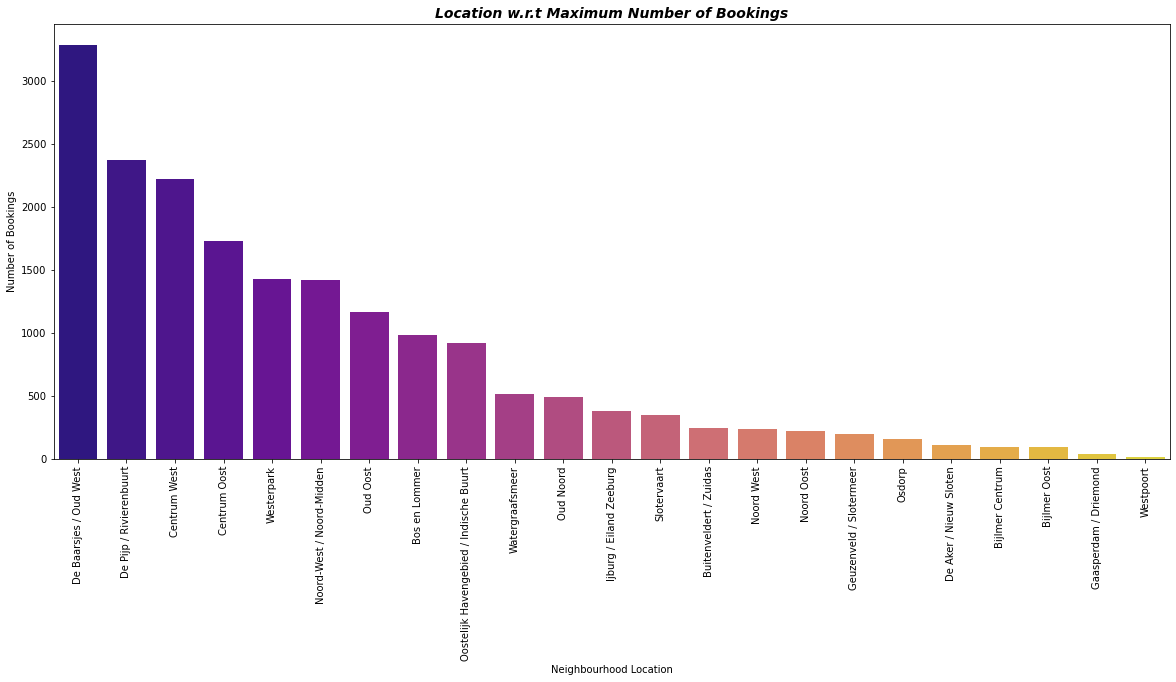

In [56]:
fig = plt.subplots(figsize=(20,8))
sns.set_style = "darkgrid"

sns.countplot(x=data["neighborhood"], order=data["neighborhood"].value_counts().index, palette="plasma")

plt.xticks(rotation=90)
plt.title("Location w.r.t Maximum Number of Bookings", fontsize=14, fontweight='bold', fontstyle='italic')
plt.xlabel('Neighbourhood Location')
plt.ylabel('Number of Bookings')

plt.show()

#### FINDINGS

From the above pie chart and bar plot we do analysis that "De Baarsjes/Oud West" is the place having maximum number of booking, i.e., 29.8% on Pie Chart and 3289(Count) on Bar Plot representation.

### PRICE RELATIONSHIP WITH RESPECT TO NEIGHBOURHOOD

In [57]:
data_price_relation = data[['neighborhood', 'price']].sort_values(by='price', ascending=False)
data_price_relation

,neighborhood,price
178,Westerpark,6000.0
180,Centrum Oost,3770.0
181,Centrum West,1920.0
179,Geuzenveld / Slotermeer,1799.0
182,Centrum West,1558.0
...,...,...
18704,Bos en Lommer,23.0
14749,Bijlmer Centrum,22.0
18705,De Pijp / Rivierenbuurt,21.0
25,Slotervaart,18.0


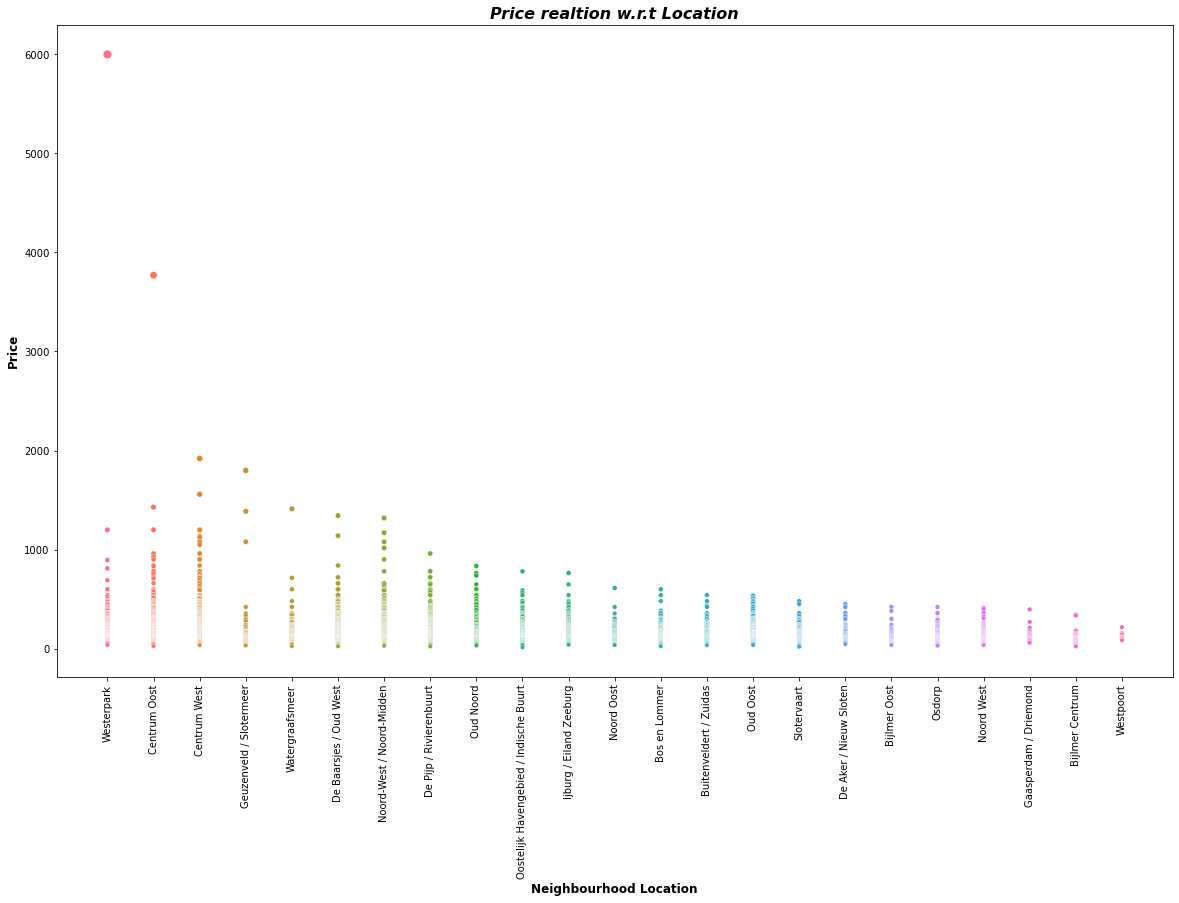

In [58]:
plt.figure(figsize=(20,12))
sns.scatterplot(data = data_price_relation, x='neighborhood', y='price', hue='neighborhood', size='price', legend=False)

plt.xticks(rotation='vertical')

plt.title('Price realtion w.r.t Location', fontsize=16, fontweight='bold', fontstyle='italic')
plt.xlabel('Neighbourhood Location', fontsize=12, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')
plt.show()

#### FINDINGS

From the above relationship, we see that the prime location of Amsterdam has higher rates as compared to other locations.

### LAST MODIFIED ANALYSIS

In [59]:
data_last_Modified_DateTime = data['last_modified']

In [60]:
data['last_modified_datetime'] = pd.to_datetime(data['last_modified'])

In [61]:
data['last_modified_time'] = data['last_modified_datetime'].dt.time

In [62]:
data['last_modified_time']

0        13:06:27.391699
1        13:06:23.607187
2        13:06:23.603546
3        13:06:22.689787
4        13:06:19.681469
              ...       
18718    16:05:14.158963
18719    16:05:14.151986
18720    16:05:14.149610
18721    16:05:14.146183
18722    16:05:12.257054
Name: last_modified_time, Length: 18723, dtype: object

In [63]:
data_neighborhood_count = data['neighborhood'].value_counts()
data_neighborhood_count.count()

23

In [64]:
data_lastmodified_location = data[['neighborhood', 'last_modified_time']].sort_values(by='neighborhood', ascending=False)[0:20]
data_lastmodified_location

,neighborhood,last_modified_time
14234,Westpoort,17:25:39.359121
7561,Westpoort,22:18:28.943696
15017,Westpoort,17:25:17.260339
12455,Westpoort,17:51:00.409860
12911,Westpoort,17:48:50.751659
12686,Westpoort,17:53:50.054151
12793,Westpoort,17:49:04.347113
8164,Westpoort,22:19:14.367571
12365,Westpoort,17:51:18.085575
14917,Westpoort,17:27:14.624261


In [65]:
data_lastmodified_location.iplot(x="last_modified_time", y="neighborhood",
                                xTitle="last_modified_time",
                                yTitle="neighborhood",
                                title="Most Last Modified Location")

#### FINDINGS

Here, we clearly see that the maximum number of modification with respect to loaction was encountered in different neighbourhoods across Amsterdam, Netherlands.

### SEEING MODIFICATION WITH RESPECT TO ROOM TYPE

In [66]:
data_last_Modified_roomtype = data.groupby(['room_type','neighborhood'], as_index=False)['last_modified_time'].agg('count')
data_last_Modified_roomtype.sort_values(by='last_modified_time', ascending=False, inplace=True)
data_last_Modified_roomtype

,room_type,neighborhood,last_modified_time
7,Entire home/apt,De Baarsjes / Oud West,2721
8,Entire home/apt,De Pijp / Rivierenbuurt,2037
5,Entire home/apt,Centrum West,1699
4,Entire home/apt,Centrum Oost,1341
21,Entire home/apt,Westerpark,1227
...,...,...,...
55,Shared room,Osdorp,2
56,Shared room,Oud Noord,2
57,Shared room,Oud Oost,2
59,Shared room,Watergraafsmeer,2


In [67]:
data_last_Modified_roomtype.iplot(x="last_modified_time", y="room_type",
                                xTitle="last_modified_time",
                                yTitle="room_type",
                                title="Most Last Modified Location")

#### FINDINGS

Here, we clearly see that the modification with respect to room type and the entire home/apt has maximum number of modifications